Размерность данных: (506, 13)
Признаки: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

=== РЕЗУЛЬТАТЫ ===
Оптимальное значение p: 1.0
Лучшая оценка (neg_mean_squared_error): -16.0306
Соответствующая MSE: 16.0306


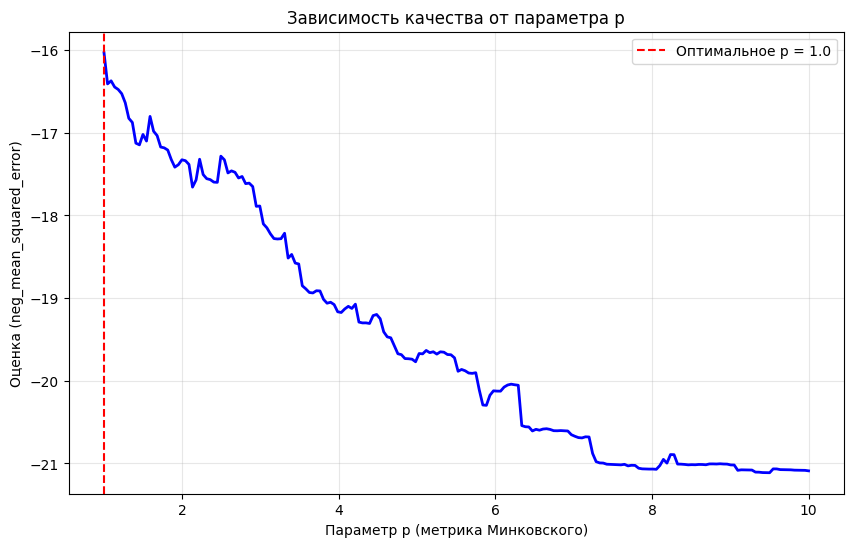


=== ДОПОЛНИТЕЛЬНАЯ ИНФОРМАЦИЯ ===
Оптимальное значение p: 1.0
Специальные случаи метрики Минковского:
p = 1: Манхэттенское расстояние
p = 2: Евклидово расстояние
p = ∞: Расстояние Чебышева


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных Boston
# В новых версиях sklearn dataset Boston удален, используется альтернативная версия загузки
boston = fetch_openml(name='boston', version=1, as_frame=True)
X = boston.data
y = boston.target

print(f"Размерность данных: {X.shape}")
print(f"Признаки: {list(X.columns)}")

# Масштабирование признаков
X_scaled = scale(X)

# Создание генератора разбиений для кросс-валидации
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Перебор параметра p от 1 до 10 с 200 вариантами
p_values = np.linspace(1, 10, 200)
best_p = 1
best_score = -float('inf')
scores = []
for p in p_values:
    # Создание модели KNN регрессора
    knn = KNeighborsRegressor(
        n_neighbors=5,
        weights='distance',
        p=p  # параметр метрики Минковского
    )

    # Кросс-валидация с отрицательной среднеквадратичной ошибкой
    cv_scores = cross_val_score(
        knn,
        X_scaled,
        y,
        cv=kf,
        scoring='neg_mean_squared_error'
    )
    mean_score = np.mean(cv_scores)
    scores.append(mean_score)
    if mean_score > best_score:
        best_score = mean_score
        best_p = p

# Вывод результатов
print("\n=== РЕЗУЛЬТАТЫ ===")
print(f"Оптимальное значение p: {best_p:.1f}")
print(f"Лучшая оценка (neg_mean_squared_error): {best_score:.4f}")

# Преобразование отрицательной MSE в положительную для интерпретации
mse = -best_score
print(f"Соответствующая MSE: {mse:.4f}")

# Визуализация зависимости качества от параметра p
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(p_values, scores, 'b-', linewidth=2)
plt.axvline(x=best_p, color='r', linestyle='--', label=f'Оптимальное p = {best_p:.1f}')
plt.xlabel('Параметр p (метрика Минковского)')
plt.ylabel('Оценка (neg_mean_squared_error)')
plt.title('Зависимость качества от параметра p')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Дополнительная информация о найденном параметре
print(f"\n=== ДОПОЛНИТЕЛЬНАЯ ИНФОРМАЦИЯ ===")
print(f"Оптимальное значение p: {best_p:.1f}")
print("Специальные случаи метрики Минковского:")
print(f"p = 1: Манхэттенское расстояние")
print(f"p = 2: Евклидово расстояние")
print(f"p = ∞: Расстояние Чебышева")